### Assignment

1) Find an automorphism of D_3. In other words, find a way to rearrange the labels of all the elements in the Cayley table so that after rearrangement, the table is still true. There are actually 5 possible (nontrivial) automorphisms of D_3, can you find them all?


2) What interesting or surprising things did you find over the course of searching for automorphisms of D_3?


### Response

It seems the only way to go about doing this question absent an intuition of how these symmetries fit together is to "brute force" the problem, by switching out the symmetries and manually checking to see if the new caley graph is self-consistent. This would would be incredibly work intensive to do by hand, and is effectively a random search wherein at each step a large number of repetitive computations are performed - or at least, we haven't been taught any other way to do it yet. I've decided to attempt to write an algorithm to do this for me using python, instead of brute forcing it by hand.

I have an intuition that the changes will result in a table that holds the same "relational symmetry across the table".

In order to do this, we need to be able to represent points on a plane, and tag them so that we can compare the resultant placement of points after transformations are applied. Basically, we can't just represent the points as (x,y) coordinates, they also need to have a third variable that differentiates the points from each other, even after they have been transformed to positions identical to their original positions.

I figured I could borrow some code from my last project.

The way I thought of doing this is by reprenting any particular shape by the points found at each vertex, but instead of just representing them as point pairs, as point triplet objects in which they are made of an x point, y point, and label.

This way after applying a set of transformations to a set of points, we can just go an autogenerated set of where each transformation would place the points, from the starting position. To do this we need an algorithm to generate the starting set of resultant locations for transformed points, given every transformation in the symmetry group, and also an algorithm to compare sets of points and see if they are equal to each other.

When defining shapes, there is some necessary calculation, as the center of the shape needs to be exactly on the origin.

I started by creating a class for an equilateral triangle, made up of the labeled points, and also the symmetries. I could've attempted to make this system more general, applicable to all sets of points and given symmetry groups, but I think that might've been more complex so I stuck with just the equilateral triangle for now.

The code can be found in the initialization file in D3Group folder

In [1]:
from D3Group import *
from jwf import *
fix()
%matplotlib inline

### Initialization

In [2]:
# Insantiating object
triangle = D3()

In [3]:
# Original points
triangle.original_points

In [4]:
# Original point attributes
for point in triangle.original_points:
    print(point.x,point.y,point.label,point.color)
    print()

0 1 a red

-0.8660254037844387 -0.4999999999999998 b blue

0.8660254037844384 -0.5000000000000003 c green



In [5]:
# transformation set dictionary, multiple uses
# (where do the points lie after any initial transformation)
triangle.tset_dict

{'I': {'a': (0, 1), 'b': (-0.87, -0.5), 'c': (0.87, -0.5)},
 'R1': {'a': (-0.87, -0.5), 'b': (0.87, -0.5), 'c': (0.0, 1.0)},
 'R2': {'a': (0.87, -0.5), 'b': (0.0, 1.0), 'c': (-0.87, -0.5)},
 'S1': {'a': (0.87, -0.5), 'b': (-0.87, -0.5), 'c': (-0.0, 1.0)},
 'S2': {'a': (-0.0, 1.0), 'b': (0.87, -0.5), 'c': (-0.87, -0.5)},
 'S3': {'a': (-0.87, -0.5), 'b': (-0.0, 1.0), 'c': (0.87, -0.5)}}

# Functionality

On starting triangle each vertex is labelled with a colored letter.

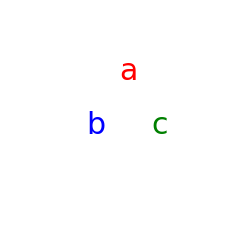

In [6]:
# Starting triangle, 
triangle.plot()

*Transformations*

Transformations can be applied individually or in ordered collections. If you don't want to continue applying transformations to your already transformed shape, then you must call the reset() function and reset it to the original vertex configuration.

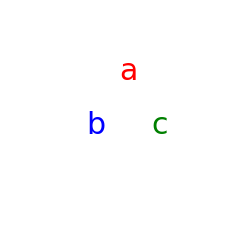

In [7]:
# Identity transformation
triangle.I()
triangle.plot()
triangle.reset()

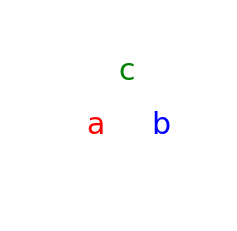

In [8]:
# Rotation 1 transformation
triangle.R1()
triangle.plot()
triangle.reset()

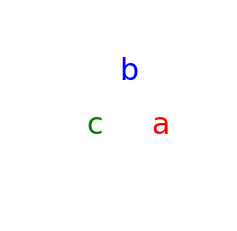

In [9]:
# Rotation 2 transformation
triangle.R2()
triangle.plot()
triangle.reset()

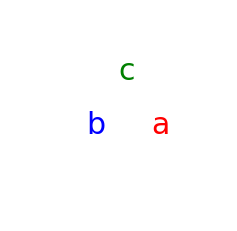

In [10]:
# Reflection 1 transformation
triangle.S1()
triangle.plot()
triangle.reset()

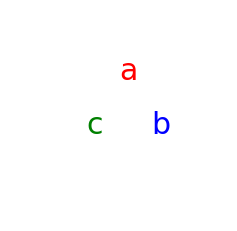

In [11]:
# Reflection 2 transformation
triangle.S2()
triangle.plot()
triangle.reset()

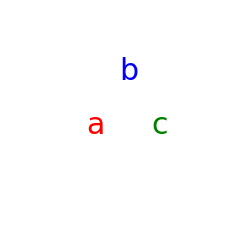

In [12]:
# Reflection 3 transformation
triangle.S3()
triangle.plot()
triangle.reset()

You can also apply sets of transformations next to each other by placing the strings in lists.

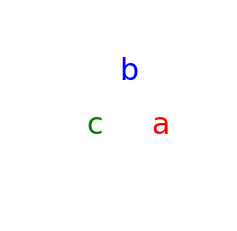

In [13]:
triangle.apply(['S1','R1','R2','S3'])
triangle.plot()

And from any transformation point, you can get the single transformation that it would take to get the vertex configuration to the one it is currently in

In [14]:
triangle.get_current_state()

'R2'

### D3 Automorphisms

Finally, you can generate the caley table for any column/index order of transformations, 

In [15]:
triangle.table(['I','R1','R2','S1','S2','S3'])

,I,R1,R2,S1,S2,S3
I,I,R1,R2,S1,S2,S3
R1,R1,R2,I,S2,S3,S1
R2,R2,I,R1,S3,S1,S2
S1,S1,S3,S2,I,R2,R1
S2,S2,S1,S3,R1,I,R2
S3,S3,S2,S1,R2,R1,I


In [16]:
# Switching R1 with R2
triangle.table(['I','R2','R1','S1','S2','S3'])

,I,R2,R1,S1,S2,S3
I,I,R2,R1,S1,S2,S3
R2,R2,R1,I,S3,S1,S2
R1,R1,I,R2,S2,S3,S1
S1,S1,S2,S3,I,R2,R1
S2,S2,S3,S1,R1,I,R2
S3,S3,S1,S2,R2,R1,I


In [18]:
# Switching around reflections
triangle.table(['I','R1','R2','S2','S1','S3'])

,I,R1,R2,S2,S1,S3
I,I,R1,R2,S2,S1,S3
R1,R1,R2,I,S3,S2,S1
R2,R2,I,R1,S1,S3,S2
S2,S2,S1,S3,I,R1,R2
S1,S1,S3,S2,R2,I,R1
S3,S3,S2,S1,R1,R2,I


In [19]:
triangle.table(['I','R1','R2','S3','S1','S2'])

,I,R1,R2,S3,S1,S2
I,I,R1,R2,S3,S1,S2
R1,R1,R2,I,S1,S2,S3
R2,R2,I,R1,S2,S3,S1
S3,S3,S2,S1,I,R2,R1
S1,S1,S3,S2,R1,I,R2
S2,S2,S1,S3,R2,R1,I


In [20]:
triangle.table(['I','R1','R2','S3','S2','S1'])

,I,R1,R2,S3,S2,S1
I,I,R1,R2,S3,S2,S1
R1,R1,R2,I,S1,S3,S2
R2,R2,I,R1,S2,S1,S3
S3,S3,S2,S1,I,R1,R2
S2,S2,S1,S3,R2,I,R1
S1,S1,S3,S2,R1,R2,I


In [21]:
# Switching it up entirely
triangle.table(['R1','I','S3','R2','S1','S2'])

,R1,I,S3,R2,S1,S2
R1,R2,R1,S1,I,S2,S3
I,R1,I,S3,R2,S1,S2
S3,S2,S3,I,S1,R2,R1
R2,I,R2,S2,R1,S3,S1
S1,S3,S1,R1,S2,I,R2
S2,S1,S2,R2,S3,R1,I
